This data has been taken from data.gov. It shows the statistics of death  in the cities on california. Here is a small analysis done by me on this data just for educational purpose.
Here I have used Pandas, seaborn , and matplotlib, to analyse the data, and visualize it.
It is just a simple analysis based on the data.


# EDA on Covid-19 dataset

In [ ]:
import pandas as pd

In [6]:
df=pd.read_csv("../covid19cases_test.csv")

In [7]:
df.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


In [8]:
df.shape

(55327, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55327 entries, 0 to 55326
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        55266 non-null  object 
 1   area                        55327 non-null  object 
 2   area_type                   55327 non-null  object 
 3   population                  53513 non-null  float64
 4   cases                       54420 non-null  float64
 5   cumulative_cases            54420 non-null  float64
 6   deaths                      54420 non-null  float64
 7   cumulative_deaths           54420 non-null  float64
 8   total_tests                 55266 non-null  float64
 9   cumulative_total_tests      55327 non-null  int64  
 10  positive_tests              55266 non-null  float64
 11  cumulative_positive_tests   55327 non-null  int64  
 12  reported_cases              54420 non-null  float64
 13  cumulative_reported_cases   544

In [10]:
df.columns

Index(['date', 'area', 'area_type', 'population', 'cases', 'cumulative_cases',
       'deaths', 'cumulative_deaths', 'total_tests', 'cumulative_total_tests',
       'positive_tests', 'cumulative_positive_tests', 'reported_cases',
       'cumulative_reported_cases', 'reported_deaths',
       'cumulative_reported_deaths', 'reported_tests'],
      dtype='object')

In [27]:
df.isnull().sum()

date                             61
area                              0
area_type                         0
population                     1814
cases                           907
cumulative_cases                907
deaths                          907
cumulative_deaths               907
total_tests                      61
cumulative_total_tests            0
positive_tests                   61
cumulative_positive_tests         0
reported_cases                  907
cumulative_reported_cases       907
reported_deaths                 907
cumulative_reported_deaths      907
reported_tests                15433
dtype: int64

In [28]:
import seaborn as sns

In [325]:
sns.displot(df['reported_tests'])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f2a345cd820> (for post_execute):


KeyboardInterrupt: 

In [31]:
df['reported_tests'].min()

-240721.0

In [54]:
df1=df.copy()

In [55]:
df1.isnull().sum()

date                             61
area                              0
area_type                         0
population                     1814
cases                           907
cumulative_cases                907
deaths                          907
cumulative_deaths               907
total_tests                      61
cumulative_total_tests            0
positive_tests                   61
cumulative_positive_tests         0
reported_cases                  907
cumulative_reported_cases       907
reported_deaths                 907
cumulative_reported_deaths      907
reported_tests                15433
dtype: int64

In [58]:
df1.dropna(thresh=10, axis=0, inplace=True)
#droping rows which has more tha n 10 NAN values in its columns
# we can also drop the small no. of 60 rows as they are very small in number 

In [68]:
df1.isnull().sum()

date                            0
area                            0
area_type                       0
population                    905
cases                           0
cumulative_cases                0
deaths                          0
cumulative_deaths               0
total_tests                     0
cumulative_total_tests          0
positive_tests                  0
cumulative_positive_tests       0
reported_cases                  0
cumulative_reported_cases       0
reported_deaths                 0
cumulative_reported_deaths      0
reported_tests                  0
dtype: int64

In [61]:
df1=df1.dropna(subset=['date']) 

In [63]:
df1=df1.dropna(subset=['total_tests', 'positive_tests']) 

In [65]:
df1.shape

(54300, 17)

In [66]:
df.shape

(55327, 17)

In [67]:
df1['reported_tests'].fillna(value=df1['reported_tests'].mean(), inplace=True)

/home/sunit.kapuria/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='population', ylabel='Density'>

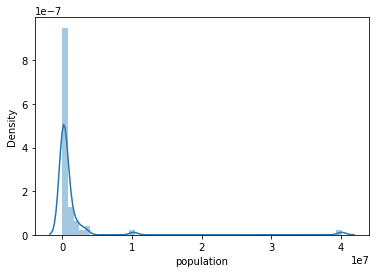

In [70]:
sns.distplot(df['population'])

In [79]:
ii=[]
popu=[]
for i in df['area'].unique():
    ii.append(i)
    popu.append(df[df['area']==i]['population'].isnull().sum())
    # df[df['area']=='Alameda'].isnull().sum()

In [81]:
import matplotlib.pyplot as plt

<BarContainer object of 32 artists>

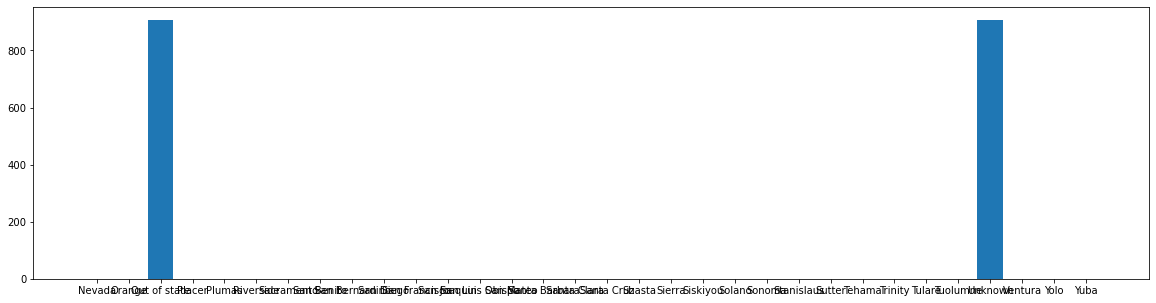

In [89]:
plt.figure(figsize=(20,5))
plt.bar(ii[29:],popu[29:])



from this analysis its shows that two areas: named out of state, and unknown so not have any population information there fore we can remove these columns 

In [90]:
df1=df1.dropna(subset=['population']) 

In [91]:
df1.isnull().sum()

date                          0
area                          0
area_type                     0
population                    0
cases                         0
cumulative_cases              0
deaths                        0
cumulative_deaths             0
total_tests                   0
cumulative_total_tests        0
positive_tests                0
cumulative_positive_tests     0
reported_cases                0
cumulative_reported_cases     0
reported_deaths               0
cumulative_reported_deaths    0
reported_tests                0
dtype: int64

# we have succesfully removed all the mossing values here. we can now beigin EDA

In [93]:
# change the date to datestamp, and we can break it down into month and year

In [94]:
# we need to decide weather we should keep the cumulative total values or not

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53395 entries, 0 to 55324
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        53395 non-null  object 
 1   area                        53395 non-null  object 
 2   area_type                   53395 non-null  object 
 3   population                  53395 non-null  float64
 4   cases                       53395 non-null  float64
 5   cumulative_cases            53395 non-null  float64
 6   deaths                      53395 non-null  float64
 7   cumulative_deaths           53395 non-null  float64
 8   total_tests                 53395 non-null  float64
 9   cumulative_total_tests      53395 non-null  int64  
 10  positive_tests              53395 non-null  float64
 11  cumulative_positive_tests   53395 non-null  int64  
 12  reported_cases              53395 non-null  float64
 13  cumulative_reported_cases   533

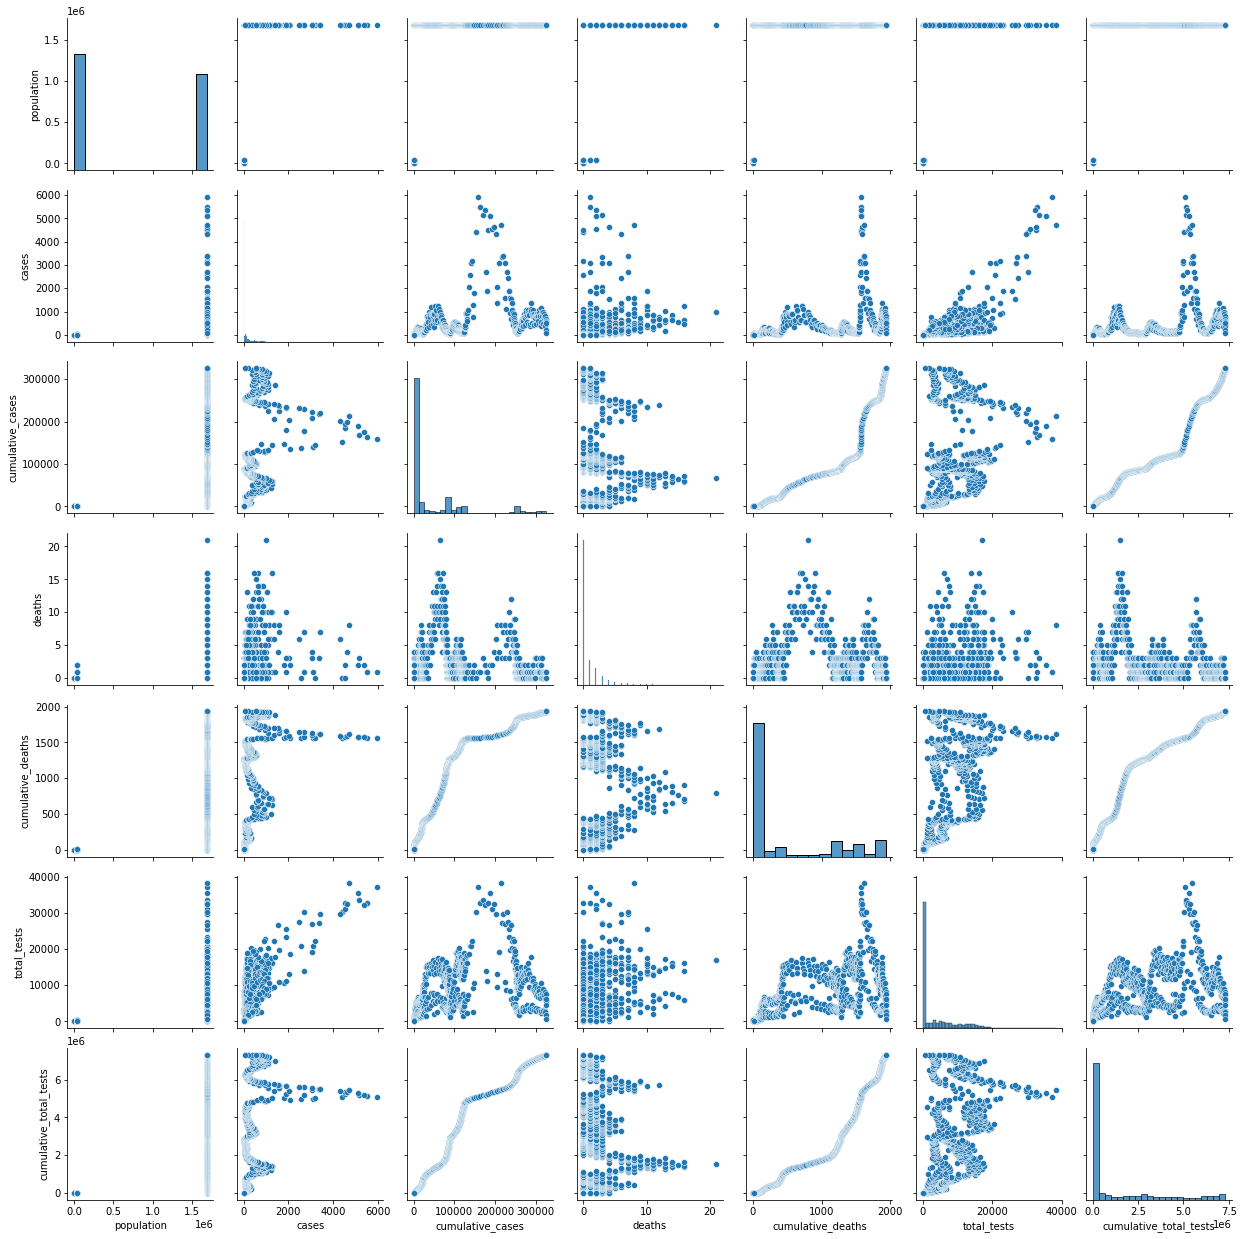

In [99]:
sns.pairplot(df1.iloc[:2000, :10])
# only a sample of data is ploted to see the pairwise relation between the columns:
#we can see there is a linear relation between cumulative deaths, cumulative cases, and cumulative total_test

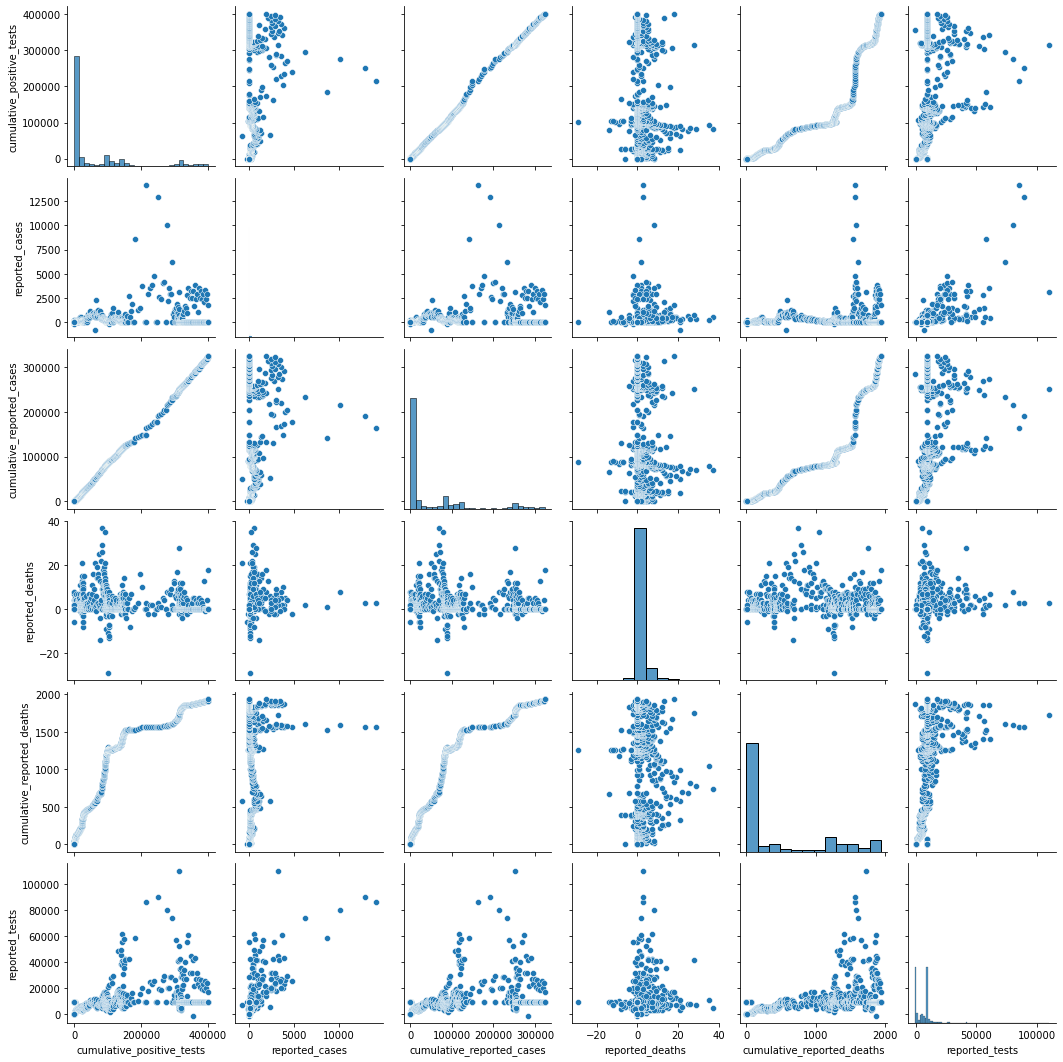

In [100]:
sns.pairplot(df1.iloc[:2000, 11:])
# from this sample of plot we can see there is a linear relation between cumulative positive test,
#cumlative reported cases, and cumulative reported deaths


In [101]:

#Now lets see how these linear variables are related to each other all together


df4=df1.copy()


In [102]:
df4.columns

Index(['date', 'area', 'area_type', 'population', 'cases', 'cumulative_cases',
       'deaths', 'cumulative_deaths', 'total_tests', 'cumulative_total_tests',
       'positive_tests', 'cumulative_positive_tests', 'reported_cases',
       'cumulative_reported_cases', 'reported_deaths',
       'cumulative_reported_deaths', 'reported_tests'],
      dtype='object')

In [103]:
df5=df4[['cumulative_cases', 'cumulative_deaths', 'cumulative_total_tests', 'cumulative_positive_tests', 'cumulative_reported_cases', 'cumulative_reported_deaths' ]]

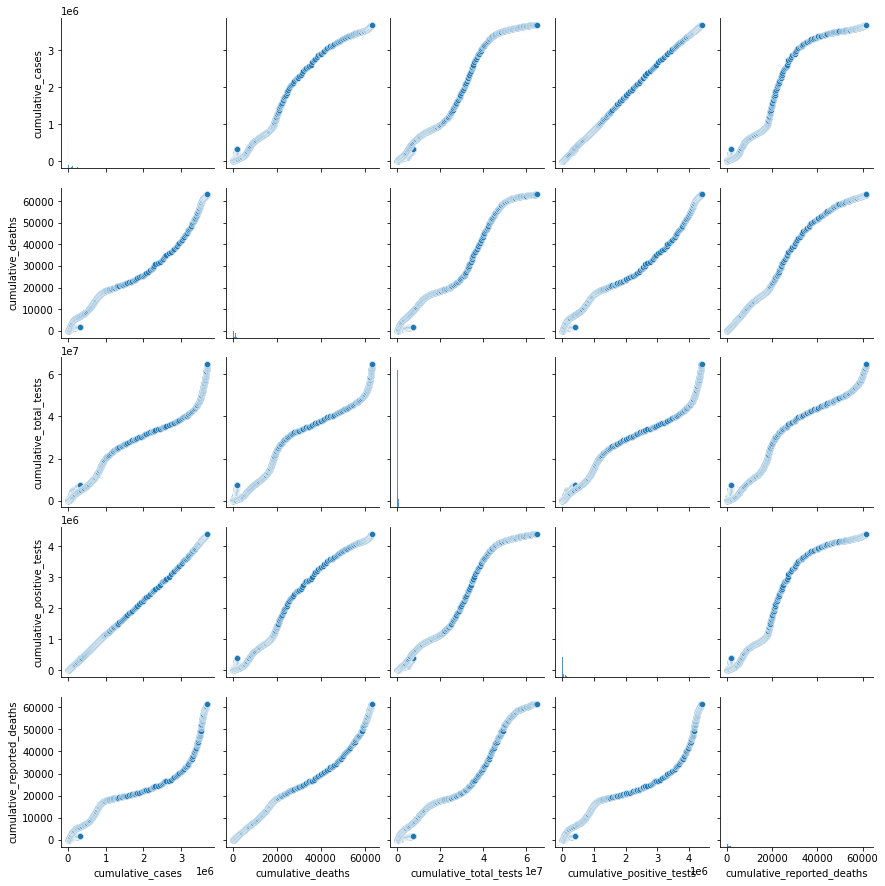

In [111]:
sns.pairplot(df5[:5000])

#here we can also keep with reported case or cases, as they are highly liinear and may bear alomst the same information

#drop cumulative reported cases from df5

In [110]:
df5.drop(labels=['cumulative_reported_cases'], axis=1, inplace=True)

/home/sunit.kapuria/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#lets analyse the cumulative positive cases and population based on areas

In [136]:
df6=df1.groupby(['area'])['population','cumulative_cases', 'cumulative_deaths', 'cumulative_total_tests', 'cumulative_positive_tests', 'cumulative_reported_cases', 'cumulative_reported_deaths'].max()

/tmp/ipykernel_398091/1970396486.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df6=df1.groupby(['area'])['population','cumulative_cases', 'cumulative_deaths', 'cumulative_total_tests', 'cumulative_positive_tests', 'cumulative_reported_cases', 'cumulative_reported_deaths'].max()


In [150]:
df6.reset_index(inplace=True)

In [166]:
df6.head()

,area,population,cumulative_cases,cumulative_deaths,cumulative_total_tests,cumulative_positive_tests,cumulative_reported_cases,cumulative_reported_deaths
0,Alameda,1685886.0,325666.0,1933.0,7316085,401249,323165.0,1933.0
1,Alpine,1117.0,130.0,0.0,3073,83,130.0,0.0
2,Amador,38531.0,9567.0,87.0,234199,11246,9526.0,87.0
3,Butte,217769.0,37146.0,440.0,492779,41448,36994.0,440.0
4,Calaveras,44289.0,8105.0,128.0,109128,9746,8064.0,128.0


In [169]:
# here we can see that cumulative_deaths	 and cumulative_reported_deaths, so we can drop one of them. 
# lets drop cumulative_reported_deaths

df6.drop('cumulative_reported_deaths', axis=1, inplace=True)

In [172]:
df6.head()

,area,population,cumulative_cases,cumulative_deaths,cumulative_total_tests,cumulative_positive_tests
0,Alameda,1685886.0,325666.0,1933.0,7316085,401249
1,Alpine,1117.0,130.0,0.0,3073,83
2,Amador,38531.0,9567.0,87.0,234199,11246
3,Butte,217769.0,37146.0,440.0,492779,41448
4,Calaveras,44289.0,8105.0,128.0,109128,9746


In [171]:
# here we can see that cumulative_cases	 and cumulative_reported_cases, so we can drop one of them. 
# lets drop cumulative_reported_deaths as cumulative_cases has some more values in them

df6.drop('cumulative_reported_cases', axis=1, inplace=True)

In [234]:
df6.head()

,area,population,cumulative_cases,cumulative_deaths,cumulative_total_tests,cumulative_positive_tests
0,Alameda,1685886.0,325666.0,1933.0,7316085,401249
1,Alpine,1117.0,130.0,0.0,3073,83
2,Amador,38531.0,9567.0,87.0,234199,11246
3,Butte,217769.0,37146.0,440.0,492779,41448
4,Calaveras,44289.0,8105.0,128.0,109128,9746


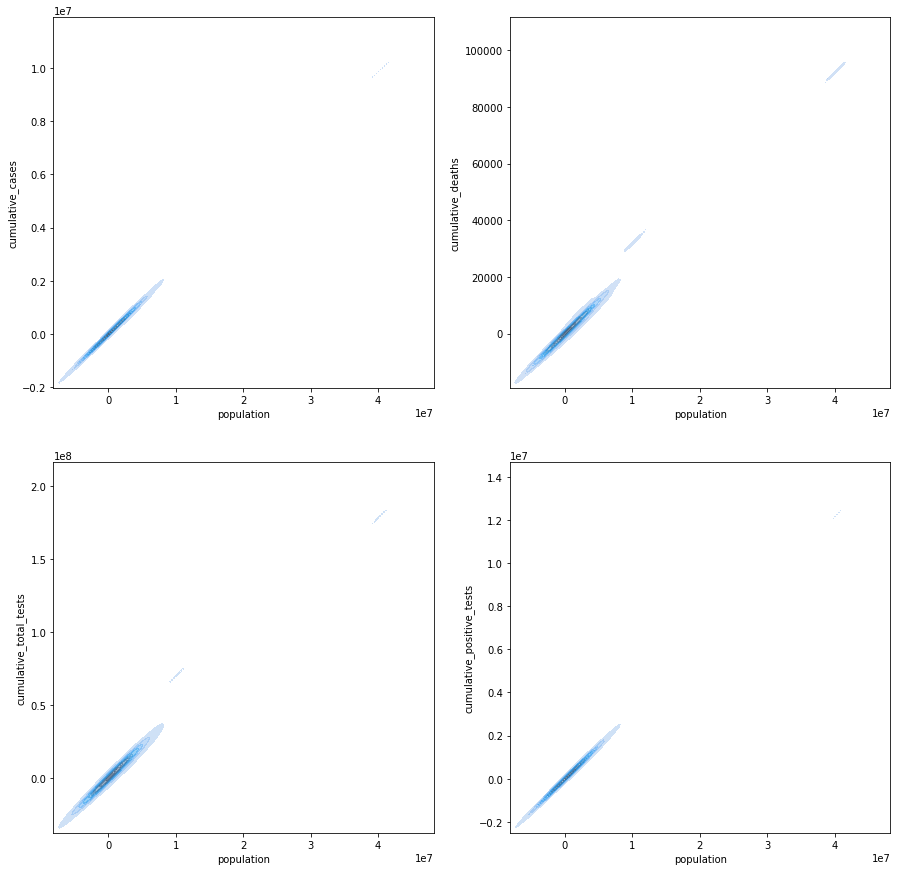

In [215]:
#this shows a linear relation between 

fig, axes=plt.subplots(2,2, figsize=(15,15))
ax=axes.ravel()
yy=['cumulative_cases', 'cumulative_deaths','cumulative_total_tests', 'cumulative_positive_tests']

for i, j in enumerate(ax):
#     print(yy[i])
#     print(i)
#     print(j)
    sns.kdeplot(ax=ax[i], x='population', y=yy[i], data=df6, multiple="fill", fill=True, common_norm=False, palette="crest",
   alpha=.5,)


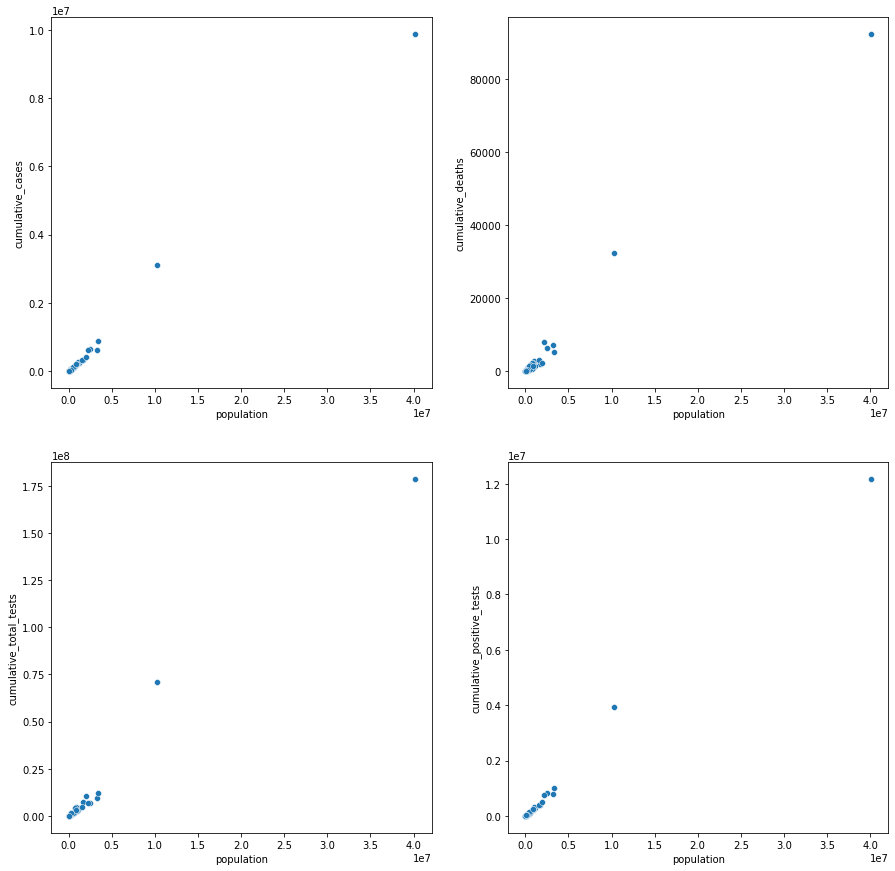

In [208]:
#this shows a linear relation between 

fig, axes=plt.subplots(2,2, figsize=(15,15))
ax=axes.ravel()
yy=['cumulative_cases', 'cumulative_deaths','cumulative_total_tests', 'cumulative_positive_tests']

for i, j in enumerate(ax):
#     print(yy[i])
#     print(i)
#     print(j)
    sns.scatterplot(ax=ax[i], x='population', y=yy[i], data=df6)


In [186]:

fig, axes=plt.subplot(2,2, figsize=(15,15))

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>

In [233]:
df6.columns

Index(['area', 'population', 'cumulative_cases', 'cumulative_deaths',
       'cumulative_total_tests', 'cumulative_positive_tests'],
      dtype='object')

In [229]:
# now lets find out places with maximum cases
max1=df6[df6['cumulative_cases']==df6['cumulative_cases'].max()]['area'].to_list()[0]
mini=df6[df6['cumulative_cases']==df6['cumulative_cases'].min()]['area'].to_list()[0]
medi=df6[df6['cumulative_cases']==df6['cumulative_cases'].median()]['area'].to_list()[0]
print(f"Area with maximum num of cases: {max1}")
print(f"Area with manimum num of cases: {mini}")
print(f"Area with median num of cases: {medi}")




Area with maximum num of cases: California
Area with manimum num of cases: Alpine
Area with median num of cases: Marin


# Top 5 places with minimum deaths


# print(df6[df6['cumulative_deaths']==0]['area'])



In [239]:
df7=pd.Series(df6['cumulative_deaths'])

In [242]:
df7.index=df6['area']

In [244]:
#top 5 cities with minimum deaths
df7.sort_values().head(5)

area
Alpine     0.0
Sierra     4.0
Mono       7.0
Modoc      8.0
Plumas    13.0
Name: cumulative_deaths, dtype: float64

In [245]:
#top 5 cities with maximum deaths
df7.sort_values(ascending=False).head(5)

area
California        92401.0
Los Angeles       32390.0
San Bernardino     7893.0
Orange             7186.0
Riverside          6495.0
Name: cumulative_deaths, dtype: float64

In [255]:
#lets add a new columns in df6 showing the ratio of deaths with respect the popultion
def newvalue(df):
    return round(df['cumulative_deaths']/df['population']*100, 2)

# df6['ratio_of_deaths']=df6.apply (lambda newvalue(df6), axis=1)

In [256]:
df6['ratio_of_deaths']=df6.apply (lambda df6: newvalue(df6), axis=1)

In [287]:
df6.head(6)

,area,population,cumulative_cases,cumulative_deaths,cumulative_total_tests,cumulative_positive_tests,ratio_of_deaths
0,Alameda,1685886.0,325666.0,1933.0,7316085,401249,0.11
1,Alpine,1117.0,130.0,0.0,3073,83,0.00
2,Amador,38531.0,9567.0,87.0,234199,11246,0.23
3,Butte,217769.0,37146.0,440.0,492779,41448,0.20
4,Calaveras,44289.0,8105.0,128.0,109128,9746,0.29
5,California,40129160.0,9871416.0,92401.0,178637759,12171596,0.23


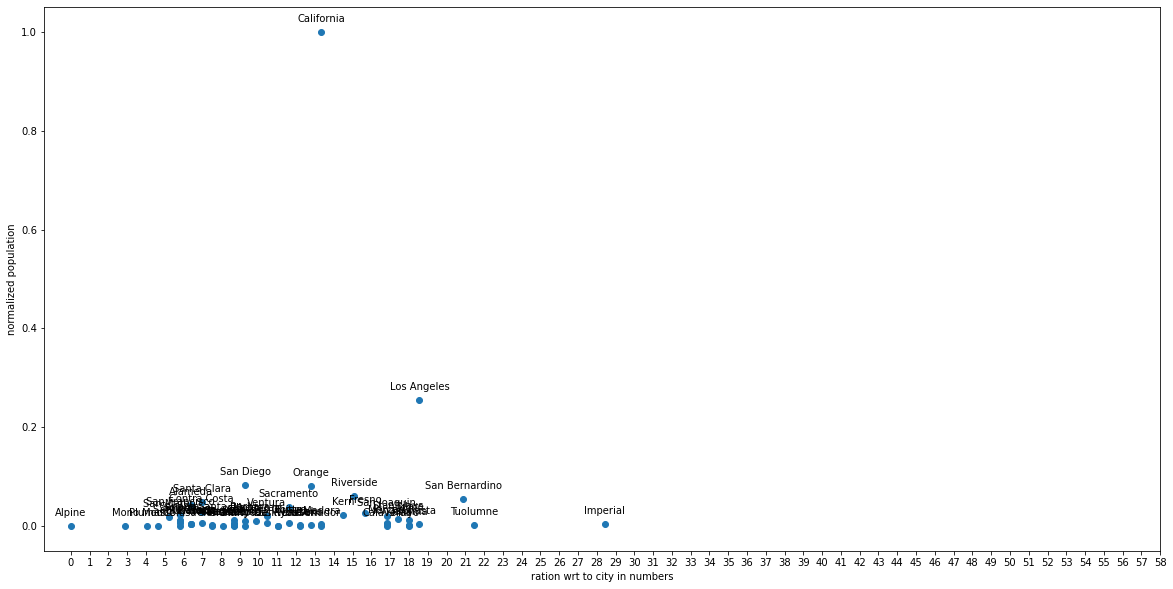

In [288]:
plt.figure(figsize=(20,10))
xs=df6['ratio_of_deaths']
ys=df6['population'].apply(lambda x: x/df6['population'].max())
plt.scatter(xs, ys)
plt.xticks(list(np.linspace(0,1,59)), list(range(len(df6))))
plt.xlabel('ration wrt to city in numbers')
plt.ylabel('normalized population')
count=0
for x,y in zip(xs,ys):

    label = df6['area'][count]

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    count+=1


In [289]:
# from the about graph we can see that ration of deaths wrt population is highest in california, followed by 
#LA, followed by other few cities. Since california is the state, lets drop it from the
# comparison and see

In [305]:
df6.drop(df6[df6['area'] == 'California'].index, inplace=True)

In [322]:
df6 = df6.reset_index(drop=True)

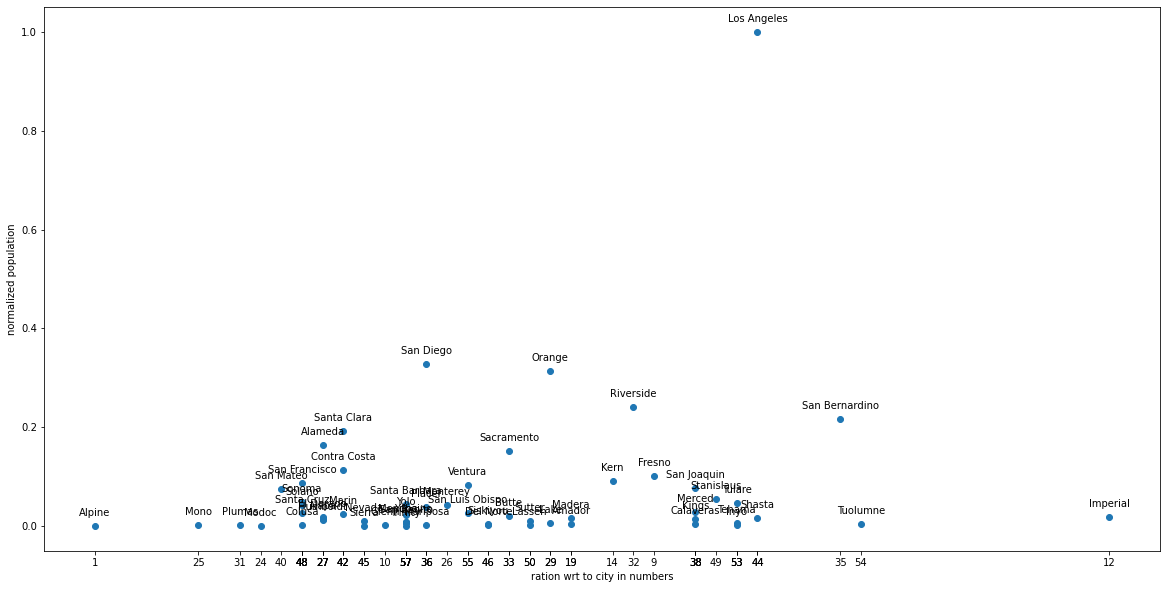

In [329]:
plt.figure(figsize=(20,10))
xs=df6['ratio_of_deaths']
ys=df6['population'].apply(lambda x: x/df6['population'].max())
plt.scatter(xs, ys)
plt.xticks(df6['ratio_of_deaths'], list(range(len(df6))))
plt.xlabel('ration wrt to city in numbers')
plt.ylabel('normalized population')
count=0
for x,y in zip(xs,ys):

    label = df6['area'][count]

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    count+=1


# this shows that the highest ratio of deaths w.r.t. population had been obsereved in Los-Angeles, followed by newby cities.

